In [83]:
from platform import python_version

print(python_version())

3.7.12


# Make sure the version of anaconda is the latest 

In [84]:
import sklearn  # importing sklearn
print(sklearn.__version__)  # printing sklearn version

1.0.1


## Importing the relevent libraries

In [319]:
import nltk # importing natural language processing toolkit 
from nltk.corpus import stopwords  # helps remove stopwords
from nltk.stem import WordNetLemmatizer # lemmantizes words
from nltk.corpus import wordnet  # will be used to replace words with there antonyms
from nltk.stem import PorterStemmer  # stemms words

In [4]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [86]:
import numpy as np  # Allows us to work with arrays.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.
import string  # import string library function
import re  # works with Regular Expressions
import pickle  # allows to open and save to files
from nltk.tokenize import word_tokenize  # tokenizes sentences.

import seaborn as sns  # Allows to polt beautiful plots.
import matplotlib.pyplot as plt  # Allows working with plots.
from mpl_toolkits import mplot3d  # plotting 3d plots

from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.
from sklearn.model_selection import train_test_split  # Splits dataset into test set and traning set. 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer  # Perform the feature scaling.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix  # creates a 
                                                                            # confusion matrix  # creates a confusion matrix
from sklearn.metrics import accuracy_score  # Returns accury score of a model.
from collections import Counter  # Allows the counting the items in an iterable list.

from sklearn.model_selection import cross_val_score  # performs cross validation. Helps in model selection.
from sklearn.model_selection import GridSearchCV  # helps select the best hyper parameters
from imblearn.over_sampling import RandomOverSampler  # Uses over sampling techniques to Sample the data correctly.
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, roc_auc_score, f1_score 
                                                                                 # Allows the usage of a classification report
    
from sklearn.metrics import precision_recall_fscore_support  # gives precison, recall, f1 score, and support
from sklearn.model_selection import RandomizedSearchCV  # performs randomized search cv

import warnings  # allows to ignore warnings
warnings.filterwarnings("ignore")  # ignores warnings

#%matplotlib inline  # helps in showing plots on the browser.### Importing the relevent libraries

## Importing the dataframe

In [329]:
DataFrame = pd.read_csv("FinalBalancedDataset.csv")  # opens csv files and assighns them to a variable.

# Checking the data from the dataframe before pre-processing

In [330]:
DataFrame.head(5)  # Taking a look at the dataframe the first elements of the dataset.

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [331]:
DataFrame = DataFrame.drop('Unnamed: 0', 1)  # column is dropped

In [332]:
DataFrame.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Toxicity  56745 non-null  int64 
 1   tweet     56745 non-null  object
dtypes: int64(1), object(1)
memory usage: 886.8+ KB


## 1. Data pre-processing

In [333]:
DataFrame.shape  # The Entries and the columns of the dataframe are viewed.

(56745, 2)

## Dealing with null values

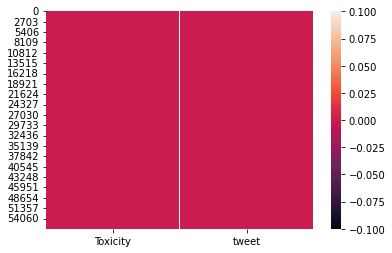

In [334]:
sns.heatmap(DataFrame.isnull())  # shows null values

In [335]:
DataFrame.isnull().sum()  # Checking the dataframe for null values.

Toxicity    0
tweet       0
dtype: int64

## Dealing with duplicates

In [336]:
DataFrame.drop_duplicates(inplace = True)  # checks for duplicates and removes them

In [337]:
print(DataFrame.pivot_table(columns=['Toxicity'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Toxicity
0    30389
1    23924
dtype: int64


In [338]:
DataFrame.info()  # checking basic information on dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54313 entries, 0 to 56744
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Toxicity  54313 non-null  int64 
 1   tweet     54313 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


## Balancing DataFrame

In [339]:
print(DataFrame.pivot_table(columns=['Toxicity'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Toxicity
0    30389
1    23924
dtype: int64


In [340]:
zero = str(round(100 * (30389/56745),2)) + "%"   # percentage of the value is checked from label column.
one  = str(round(100 * (23924/56745),2)) + "%"  # percentage of the value is checked from label column.

In [341]:
print("0 is represented ", zero, "\n1 is represented ", one)
# percentage of the value is printed of label column.

0 is represented  53.55% 
1 is represented  42.16%


In [342]:
30389 - 23924

6465

In [343]:
row_to_remove = np.random.RandomState(1).choice(DataFrame[DataFrame['Toxicity']==0].index,size=6465,replace=False)
DataFrame = DataFrame.drop(row_to_remove)

In [344]:
print(DataFrame.pivot_table(columns=['Toxicity'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Toxicity
0    23924
1    23924
dtype: int64


# Reseting index

In [345]:
DataFrame.reset_index(drop=True, inplace=True)  # reseting index.

In [346]:
DataFrame

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,#model i love u take with u all the time in ...
3,0,factsguide: society now #motivation
4,0,[2/2] huge fan fare and big talking before the...
...,...,...
47843,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
47844,1,"you've gone and broke the wrong heart baby, an..."
47845,1,young buck wanna eat!!.. dat nigguh like I ain...
47846,1,youu got wild bitches tellin you lies


In [347]:
DataFrame.info()  # checking basic information on dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47848 entries, 0 to 47847
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Toxicity  47848 non-null  int64 
 1   tweet     47848 non-null  object
dtypes: int64(1), object(1)
memory usage: 747.8+ KB


## removing non word symbols

In [348]:
DataFrame['tweet'] = DataFrame['tweet'].str.replace('[^\w\s]','')
DataFrame.head()

,Toxicity,tweet
0,0,user when a father is dysfunctional and is so...
1,0,user user thanks for lyft credit i cant use ca...
2,0,model i love u take with u all the time in u...
3,0,factsguide society now motivation
4,0,22 huge fan fare and big talking before they l...


## Removing most frequent words

In [349]:
freq = pd.Series(' '.join(DataFrame['tweet']).split()).value_counts()[:10]
freq

a        13875
the      13759
user     13757
to       12362
you       8929
bitch     8024
RT        7359
and       7208
I         6485
in        6152
dtype: int64

In [350]:
freq = pd.Series(' '.join(DataFrame['tweet']).split()).value_counts()[:5]
freq

a       13875
the     13759
user    13757
to      12362
you      8929
dtype: int64

In [351]:
DataFrame['tweet'] = DataFrame['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
DataFrame.head()

,Toxicity,tweet
0,0,when father is dysfunctional and is so selfish...
1,0,thanks for lyft credit i cant use cause they d...
2,0,model i love u take with u all time in urð ððð...
3,0,factsguide society now motivation
4,0,22 huge fan fare and big talking before they l...


## Removing the rare words

In [352]:
freq = pd.Series(' '.join(DataFrame['tweet']).split()).value_counts()[-15:]
freq

fanmeetð                1
Unicorn                 1
ImNotaPlayerTho         1
meecuz                  1
bye128530               1
recoils                 1
wrenn                   1
phopos                  1
Perfection              1
beforebihday            1
butchers                1
Cam_Coles               1
ððµð                    1
madtown                 1
witchktaftyaayladies    1
dtype: int64

In [353]:
DataFrame['tweet'] = DataFrame['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
DataFrame.head()

,Toxicity,tweet
0,0,when father is dysfunctional and is so selfish...
1,0,thanks for lyft credit i cant use cause they d...
2,0,model i love u take with u all time in urð ððð...
3,0,factsguide society now motivation
4,0,22 huge fan fare and big talking before they l...


## Spliting X and y variables.

In [354]:
X = DataFrame.iloc[:, -1].values  # selecting the values for the X variable.

In [355]:
y = DataFrame.iloc[:, :-1].values # selecting the values for the Y variable. # done using .to_numpy and not 
                                                       # .iloc as .to_numpy creates a horizontal bar while .iloc creates a 
                                                       # horizontal bar which will not alighn with the x values.

In [356]:
print("X ", X, "y ", y)  # priting arrays

X  ['when father is dysfunctional and is so selfish he drags his kids into his dysfunction run'
 'thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked'
 'model i love u take with u all time in urð ðððð ððð' ...
 'young buck wanna eat dat nigguh like I aint fuckin dis up again'
 'youu got wild bitches tellin lies'
 'Ruffled Ntac Eileen Dahlia Beautiful color combination of pink orange yellow amp white A Coll httptcoH0dYEBvnZB'] y  [[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]


## Removing punctuations, special character and converting text to lower case

In [371]:
no_punctuation_and_no_stop_words = []
for i in range(0,len(X)):
  # removing non word symbols
  data = re.sub(r'\W',' ', str(X[i]))
  # converting the data to lower case
  data = data.lower()
  # removing single characters
  data = re.sub(r'\s+[a-z]\s+', ' ', data)
  # removing single characters at the start of a sentence
  data = re.sub(r'^[a-z]\s+',' ',data)
  #replacing everything other than alphabets with a space
  data =re.sub("[^a-zA-Z]"," ",data)
  # removing extra spaces
  data = re.sub(r'\s+',' ', data)
  no_punctuation_and_no_stop_words.append(data)

In [372]:
no_punctuation_and_no_stop_words

['when father is dysfunctional and is so selfish he drags his kids into his dysfunction run',
 'thanks for lyft credit cant use cause they dont offer wheelchair vans in pdx disapointed getthanked',
 'model love take with all time in ur ',
 'factsguide society now motivation',
 ' huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo',
 'camping tomorrow danny ',
 'next school year is year for exams cant think about that school exams hate imagine actorslife revolutionschool girl',
 'we won love land allin cavs champions cleveland clevelandcavaliers ',
 'welcome here im its so gr ',
 ' ireland consumer price index mom climbed from previous in may blog silver gold forex',
 ' get see my daddy today days gettingfed',
 'cnn calls michigan middle school build wall chant tcot',
 'no comment in australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins',
 'ouchjunior is angry got junior yugyoem omg',
 ' am thankful for having 

## Removing stop words

In [377]:
# removing stop words
tokenized_words = [word_tokenize(str(i)) for i in no_punctuation_and_no_stop_words]
stopset = set(stopwords.words('english'))
clean_model = []
for m in range(len(tokenized_words)):
      stop_m = [i for i in tokenized_words[m] if i not in stopset]
      clean_model.append(' '.join(stop_m))

## Clean sentences model

In [378]:
clean_model

['father dysfunctional selfish drags kids dysfunction run',
 'thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked',
 'model love take time ur',
 'factsguide society motivation',
 'huge fan fare big talking leave chaos pay disputes get allshowandnogo',
 'camping tomorrow danny',
 'next school year year exams cant think school exams hate imagine actorslife revolutionschool girl',
 'love land allin cavs champions cleveland clevelandcavaliers',
 'welcome im gr',
 'ireland consumer price index mom climbed previous may blog silver gold forex',
 'get see daddy today days gettingfed',
 'cnn calls michigan middle school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins',
 'ouchjunior angry got junior yugyoem omg',
 'thankful paner thankful positive',
 'retweet agree',
 'friday smiles around via ig cookies make people',
 'know essential oils made chemicals',
 'euro people blaming ha conceded goal fat

## Replacing words starting with not with there antonym.

In [379]:
tokenized_words = [word_tokenize(str(i)) for i in clean_model]
temp_word = ""
model_after_antonyms_replacement = []
for m in range(len(tokenized_words)):
  final_word = []
  for n in range(len(tokenized_words[m])):
    antonyms = []
    # replacing not with not_
    if tokenized_words[m][n] == "not":
      temp_word = "not_"
    # replacing word starting with not_ with its antonym
    elif temp_word == "not_":
      for sys in wordnet.synsets(tokenized_words[m][n]):
        for s in sys.lemmas():
          for a in s.antonyms():
            antonyms.append(a.name())
      # adding antonym word to original word
      if len(antonyms) >= 1:
          tokenized_words[m][n] = antonyms[0]
      # adding not_ to original word
      else:
        if tokenized_words[m][n] != tokenized_words[m][-1]:
          tokenized_words[m][n+1] = temp_word + tokenized_words[m][n+1]
      temp_word = ""
    if tokenized_words[m][n] != "not":
          final_word.append(tokenized_words[m][n])
  model_after_antonyms_replacement.append(' '.join(final_word))        

In [380]:
clean_model = model_after_antonyms_replacement
clean_model

['father dysfunctional selfish drags kids dysfunction run',
 'thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked',
 'model love take time ur',
 'factsguide society motivation',
 'huge fan fare big talking leave chaos pay disputes get allshowandnogo',
 'camping tomorrow danny',
 'next school year year exams cant think school exams hate imagine actorslife revolutionschool girl',
 'love land allin cavs champions cleveland clevelandcavaliers',
 'welcome im gr',
 'ireland consumer price index mom climbed previous may blog silver gold forex',
 'get see daddy today days gettingfed',
 'cnn calls michigan middle school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins',
 'ouchjunior angry got junior yugyoem omg',
 'thankful paner thankful positive',
 'retweet agree',
 'friday smiles around via ig cookies make people',
 'know essential oils made chemicals',
 'euro people blaming ha conceded goal fat

## Lemmatization

In [381]:
tokenized_words = [word_tokenize(str(i)) for i in clean_model]
lemmatizer = WordNetLemmatizer()
lematized_model = []
for m in range(len(tokenized_words)):
      lema_m = [lemmatizer.lemmatize(word) for word in tokenized_words[m]]
      lematized_model.append(' '.join(lema_m))

## Lemmatized model

In [382]:
lematized_model

['father dysfunctional selfish drag kid dysfunction run',
 'thanks lyft credit cant use cause dont offer wheelchair van pdx disapointed getthanked',
 'model love take time ur',
 'factsguide society motivation',
 'huge fan fare big talking leave chaos pay dispute get allshowandnogo',
 'camping tomorrow danny',
 'next school year year exam cant think school exam hate imagine actorslife revolutionschool girl',
 'love land allin cavs champion cleveland clevelandcavaliers',
 'welcome im gr',
 'ireland consumer price index mom climbed previous may blog silver gold forex',
 'get see daddy today day gettingfed',
 'cnn call michigan middle school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins',
 'ouchjunior angry got junior yugyoem omg',
 'thankful paner thankful positive',
 'retweet agree',
 'friday smile around via ig cooky make people',
 'know essential oil made chemical',
 'euro people blaming ha conceded goal fat rooney gave a